# 1. Import Libraries and Dataset

In this section the necessary python libraries and datasets are imported into the notebook.

In [980]:
import pandas as pd
from datetime import date, timedelta
pd.set_option('display.max_columns', 500)
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib
import pickle

In [981]:
df = pd.read_csv('data/data_fighters.csv')

In [982]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name_a,f1_name_span,f2_name_a,f2_name_span,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Heavy Artillery\n\n,Tom Aaron,NaN,NaN,Eric Steenberg,\n \n Catch Weight Bout\n,"\n ,\n 1\n","\n ,\n \n 0:56\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n 5' 8""\n",\n 135 lbs.\n,"\n 69""\n",\n Orthodox\n,"\n \n Mar 02, 1992\n \n",\n\n UFC Fight Night: Cowboy vs. Gaethje\n\n,Brad Katona,NaN,Hunter Azure,NaN,\n \n Bantamweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,0.0,0.0,\n 21 of 60\n,\n 41 of 118\n,\n 35%\n,\n 34%\n,\n 40 of 83\n,\n 55 of 133\n,\n 3 of 12\n,\n 0 of 1\n,\n 25%\n,\n 0%\n,0.0,0.0,1.0,1.0,0.0,1.0,\n 18 of 51\n,\n 25 of 91\n,\n 2 of 7\n,\n 11 of 20\n,\n 1 of 2\n,\n 5 of 7\n,\n 17 of 54\n,\n 33 of 105\n,\n 4 of 6\n,\n 6 of 8\n,\n 0 of 0\n,\n 2 of 5\n
2,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n 5' 11""\n",\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 17, 1990\n \n",\n\n Strikeforce - Miami\n\n,NaN,Michael Byrnes,NaN,Dave Zitanick,\n \n Welterweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Henderson vs. Babalu\n\n,Tom Aaron,NaN,NaN,Matt Ricehouse,\n \n Lightweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\n Ion Cutelaba\n\n,\n Record: 15-5-0 (1 NC)\n ...,"\n 6' 1""\n",\n 205 lbs.\n,"\n 75""\n",\n Southpaw\n,"\n \n Dec 14, 1993\n \n",\n\n UFC Fight Night: MacDonald vs Thompson\n...,Misha Cirkunov,NaN,Ion Cutelaba,NaN,\n \n Light Heavyweight Bout\n,"\n ,\n 3\n","\n ,\n \n 1:22\n\n",\n W\n,\n L\n,0.0,0.0,\n 44 of 94\n,\n 24 of 115\n,\n 46%\n,\n 20%\n,\n 55 of 106\n,\n 25 of 116\n,\n 1 of 3\n,\n 0 of 1\n,\n 33%\n,\n 0%\n,1.0,0.0,1.0,1.0,0.0,0.0,\n 36 of 78\n,\n 12 of 93\n,\n 7 of 15\n,\n 7 of 17\n,\n 1 of 1\n,\n 5 of 5\n,\n 35 of 81\n,\n 20 of 110\n,\n 9 of 13\n,\n 3 of 4\n,\n 0 of 0\n,\n 1 of 1\n


In [983]:
event_df = pd.read_csv("data/data_fights.csv")

In [984]:
event_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [985]:
df.isnull().sum()

name                     0
record                   0
height                   0
weight                   0
reach                    0
stance                   0
dob                      0
event_name               0
f1_name_a             3850
f1_name_span         11336
f2_name_a             5482
f2_name_span          9704
weightclass              0
rounds                   0
time                     0
f1_result                0
f2_result                0
f1_kd                  664
f2_kd                  664
f1_sig_str             664
f2_sig_str             664
f1_sig_str_perc        664
f2_sig_str_perc        664
f1_tot_str             664
f2_tot_str             664
f1_td                  664
f2_td                  664
f1_td_perc             664
f2_td_perc             664
f1_sub_att             664
f2_sub_att             664
f1_pass                664
f2_pass                664
f1_rev                 664
f2_rev                 664
f1_sig_str_head        664
f2_sig_str_head        664
f

# 2. Data Cleaning and Exploration

This section is focused on preparing the data for modelling. As the data was scraped off of the web much of it is in the incorrect format. It should be noted that after this section the data is not completely clean, some of the cleaning occurs in the feature engineering section that follows. This was an initial clean to make the data easier to work with.

## 2.1. Fight Data

To begin I made sure that all of the data was in string format. I then stripped the white space and '\n' line spacings that were present. Due to inconsitencies in the element format of the ufc statistics website, I had to scrape the fighter names in two ways. Sometimes the fighter name was contained in an 'a' element, and sometimes it was inside a 'span' element. I then got rid of the two extra columns by filling in the nans of the 'a' column with the contents of the 'span' column.

In [986]:
df = df.astype(str)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace(['nan','--',''], np.nan)
df = df.replace(['\n',',',' Bout',' lbs.'], '', regex=True)

In [987]:
df['f1_name_a'].fillna(df['f1_name_span'], inplace=True)
df['f2_name_a'].fillna(df['f2_name_span'], inplace=True)
df.rename(columns={'f1_name_a':'f1_name', 'f2_name_a':'f2_name'}, inplace=True)
del df['f1_name_span']
del df['f2_name_span']

I then converted the height and reach from feet and inches to meters. A fighter's reach and height are usually very similar so any missing values of height were filled in with the fighters reach, and vice versa.

In [988]:
df['height'] = df['height'].replace([' ','"'],'', regex=True)
df[['feet','inches']] = df['height'].str.split("'", expand=True)
df['reach'] = df['reach'].replace('"','', regex=True)

In [989]:
df['feet'] = pd.to_numeric(df['feet'])
df['inches'] = pd.to_numeric(df['inches'])
df['reach'] = pd.to_numeric(df['reach'])

df['height'] = round((df['feet']*0.3048) + (df['inches']*0.0254), 2)
df['reach'] = round(df['reach']*0.0254, 2)

df.drop(columns=['feet','inches'], inplace=True)

26765.4
21894.54


In [990]:
df['reach'].fillna(df['height'], inplace=True)
df['height'].fillna(df['reach'], inplace=True)

The round and time that the fight ended was then converted to an overall fight time feature. Each round in a UFC fight is 5 mintes long.

In [991]:
df[['minutes', 'seconds']] = df['time'].str.split(':', expand=True)
df[['minutes', 'seconds', 'rounds']] = df[['minutes', 'seconds', 'rounds']].astype(float)

In [992]:
df['fight_time'] = round(((df['rounds'] - 1) * 5) + df['minutes'] + (df['seconds']/60), 2)

I then converted each fighter's date of birth to a datetime object.

In [993]:
df['dob'] = pd.to_datetime(df['dob'], format='%b %d %Y', errors='coerce')

In [994]:
df.head(5)

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground,minutes,seconds,fight_time
0,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,1978-07-13,Strikeforce - Heavy Artillery,Tom Aaron,Eric Steenberg,Catch Weight,1.0,0:56,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56.0,0.93
1,Hunter Azure,Record: 8-0-0,1.73,135,1.75,Orthodox,1992-03-02,UFC Fight Night: Cowboy vs. Gaethje,Brad Katona,Hunter Azure,Bantamweight,3.0,5:00,L,W,0.0,0.0,21 of 60,41 of 118,35%,34%,40 of 83,55 of 133,3 of 12,0 of 1,25%,0%,0.0,0.0,1.0,1.0,0.0,1.0,18 of 51,25 of 91,2 of 7,11 of 20,1 of 2,5 of 7,17 of 54,33 of 105,4 of 6,6 of 8,0 of 0,2 of 5,5.0,0.0,15.00
2,Michael Byrnes,Record: 5-2-0,1.80,155,1.80,NaN,1990-07-17,Strikeforce - Miami,Michael Byrnes,Dave Zitanick,Welterweight,3.0,5:00,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,15.00
3,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,1978-07-13,Strikeforce - Henderson vs. Babalu,Tom Aaron,Matt Ricehouse,Lightweight,3.0,5:00,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,15.00
4,Ion Cutelaba,Record: 15-5-0 (1 NC),1.85,205,1.90,Southpaw,1993-12-14,UFC Fight Night: MacDonald vs Thompson,Misha Cirkunov,Ion Cutelaba,Light Heavyweight,3.0,1:22,W,L,0.0,0.0,44 of 94,24 of 115,46%,20%,55 of 106,25 of 116,1 of 3,0 of 1,33%,0%,1.0,0.0,1.0,1.0,0.0,0.0,36 of 78,12 of 93,7 of 15,7 of 17,1 of 1,5 of 5,35 of 81,20 of 110,9 of 13,3 of 4,0 of 0,1 of 1,1.0,22.0,11.37


## 2.2. Event Data

A fight's date was not present on the fight breakdown web page, therefore I ahd to seperately scrape the details of each event. This section is focused on cleaning the event data so that it can then be merged to the original fight dataframe, resulting in each fght having a date feature that can then be used to calculate the fighters' age at the time of the bout.

In [885]:
event_df.duplicated(subset=None).sum()

0

In [886]:
event_df = event_df.replace(['\n',','],'', regex=True)

In [887]:
event_df = event_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [888]:
event_df['event_date'] = pd.to_datetime(event_df['event_date'], format='%B %d %Y')

In the two cells below a visualisation is made to show the number of fights that occur in the UFC each year. This was done mainly out of curiosity to see how MMA has grown in popularity over the years.

In [889]:
event_df_copy = event_df.copy()
event_df_copy['event_date'] = event_df_copy['event_date'].dt.year.astype(str)
event_df_copy = event_df_copy[['event_date','event_name']].groupby(by='event_date').count()
event_df_copy.reset_index(inplace=True)
event_df_copy.rename(columns={'event_date':'Year','event_name':'Number of UFC Fights'}, inplace=True)

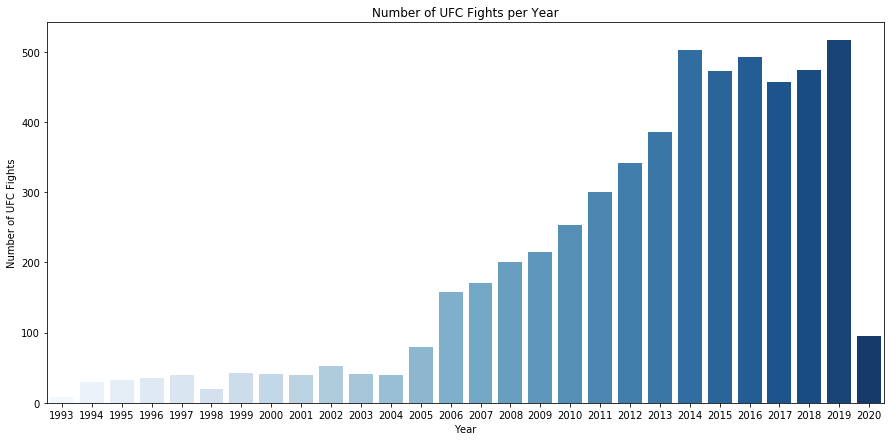

In [979]:
plt.figure(figsize=(15,7))
sns.barplot(x='Year', y='Number of UFC Fights', data=event_df_copy, orient='v', palette='Blues')
plt.title('Number of UFC Fights per Year')
plt.show()

The unwanted columns in the event dataframe are then dropped so that just the name of the event and the date that it occurred are left.

In [895]:
event_df = event_df[['event_name','event_date']]

In [896]:
event_df = event_df.drop_duplicates()

In [897]:
event_df

,event_name,event_date
0,UFC Fight Night: Gustafsson vs. Smith,2019-06-01
12,UFC 238: Cejudo vs. Moraes,2019-06-08
25,UFC Fight Night: Moicano vs. The Korean Zombie,2019-06-22
36,UFC Fight Night: Ngannou vs. Dos Santos,2019-06-29
48,UFC 239: Jones vs. Santos,2019-07-06
...,...,...
5475,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15
5488,UFC Fight Night: Felder vs. Hooker,2020-02-22
5500,UFC Fight Night: Benavidez vs. Figueiredo,2020-02-29
5512,UFC 248: Adesanya vs. Romero,2020-03-07


The fight dataframe and event dataframe are then merged on the unique event name so that each fight now has a date, and the fighter ages can be calculated for each bout.

In [898]:
df = pd.merge(df, event_df, left_on='event_name', right_on='event_name')

# 3. Feature Engineering

This section focuses on creating more relevant features from the features that were scraped off of the website. It should be noted that when scraping the data, I extracted all of the available information, more than was necessary for this project, in case I wanted to complete different analysis in the future.

The UFC displays 6 static fighter statistics and 8 dynamic fighter statistics on their fighter career summary pages. It is assumed that these give the best indication of a fighter's performance, otherwise they would show different statistics. Therefore, the aim of this section is to transform the data in its current sate, to represent those statistics. The features on the UFC website are as follows:

Static Statistics:
- Height
- Weight 
- Reach
- Stance
- DOB (this is to be replaced with age for model)
- MMA Record (this is to be replaced with win percentage for the model)

Dynamic Statistics:
- Strikes landed per minute
- Striking accuracy
- Strikes absorbed per minute
- Striking defence
- Takedowns per 15 minutes
- Takedown accuracy
- Takedown defence
- Submission attempts per 15 minutes

Firstly I sorted the dataframe by name and then event date so that each fighter's fighting history was ordered chronologically.

In [899]:
df.sort_values(by=['name','event_date'], inplace=True)
df.reset_index(drop=True, inplace=True)

Each fighter's entire fighting hisory was scraped, meaning that for each fight there were two rows. At this stage, the fighter who's instance it is may be fighter 1 or fighter 2. In order to only keep the fighter data that is associated to the fighter 'name', a mask was applied to the dataframe and the relevant information was kept in new columns, the rest was omitted.

In [900]:
f1_mask = (df['name'] == df['f1_name'])
df_valid_f1 = df[f1_mask]

f2_mask = (df['name'] == df['f2_name'])
df_valid_f2 = df[f2_mask]

df['result'] = 0
df.loc[f1_mask, 'result'] = df_valid_f1['f1_result']
df.loc[f2_mask, 'result'] = df_valid_f2['f2_result']

df['kds'] = 0
df.loc[f1_mask, 'kds'] = df_valid_f1['f1_kd']
df.loc[f2_mask, 'kds'] = df_valid_f2['f2_kd']

df['tds'] = 0
df.loc[f1_mask, 'tds'] = df_valid_f1['f1_td']
df.loc[f2_mask, 'tds'] = df_valid_f2['f2_td']

df['sub_att'] = 0
df.loc[f1_mask, 'sub_att'] = df_valid_f1['f1_sub_att']
df.loc[f2_mask, 'sub_att'] = df_valid_f2['f2_sub_att']

df['pass'] = 0
df.loc[f1_mask, 'pass'] = df_valid_f1['f1_pass']
df.loc[f2_mask, 'pass'] = df_valid_f2['f2_pass']

df['rev'] = 0
df.loc[f1_mask, 'rev'] = df_valid_f1['f1_rev']
df.loc[f2_mask, 'rev'] = df_valid_f2['f2_rev']

df['tot_str'] = 0
df.loc[f1_mask, 'tot_str'] = df_valid_f1['f1_tot_str']
df.loc[f2_mask, 'tot_str'] = df_valid_f2['f2_tot_str']

df['sig_str_head'] = 0
df.loc[f1_mask, 'sig_str_head'] = df_valid_f1['f1_sig_str_head']
df.loc[f2_mask, 'sig_str_head'] = df_valid_f2['f2_sig_str_head']

df['sig_str_body'] = 0
df.loc[f1_mask, 'sig_str_body'] = df_valid_f1['f1_sig_str_body']
df.loc[f2_mask, 'sig_str_body'] = df_valid_f2['f2_sig_str_body']

df['sig_str_leg'] = 0
df.loc[f1_mask, 'sig_str_leg'] = df_valid_f1['f1_sig_str_leg']
df.loc[f2_mask, 'sig_str_leg'] = df_valid_f2['f2_sig_str_leg']

df['sig_str_dist'] = 0
df.loc[f1_mask, 'sig_str_dist'] = df_valid_f1['f1_sig_str_dist']
df.loc[f2_mask, 'sig_str_dist'] = df_valid_f2['f2_sig_str_dist']

df['sig_str_clinch'] = 0
df.loc[f1_mask, 'sig_str_clinch'] = df_valid_f1['f1_sig_str_clinch']
df.loc[f2_mask, 'sig_str_clinch'] = df_valid_f2['f2_sig_str_clinch']

df['sig_str_ground'] = 0
df.loc[f1_mask, 'sig_str_ground'] = df_valid_f1['f1_sig_str_ground']
df.loc[f2_mask, 'sig_str_ground'] = df_valid_f2['f2_sig_str_ground']

In [901]:
df = df.drop(columns=['f1_result','f2_result',
                     'f1_kd','f2_kd',
                     'f1_td','f2_td',
                     'f1_sub_att','f2_sub_att',
                     'f1_rev','f2_rev',
                     'f1_sig_str_head','f2_sig_str_head',
                     'f1_sig_str_body','f2_sig_str_body',
                     'f1_sig_str_leg','f2_sig_str_leg',
                     'f1_sig_str_dist','f2_sig_str_dist',
                     'f1_sig_str_clinch','f2_sig_str_clinch',
                     'f1_sig_str_ground','f2_sig_str_ground',
                     'f1_sig_str','f2_sig_str',
                     'f1_sig_str_perc','f2_sig_str_perc',
                     'f1_tot_str','f2_tot_str',
                     'f1_td_perc','f2_td_perc',
                     'f1_pass','f2_pass'])

Many of the features were in the format of 'X successful of Y attempts'. The successful and attempted statistics are seperated into their own respective features.

In [902]:
df.replace(' of ',' ', regex=True, inplace=True)

df[['tds_succ','tds_att']] = df['tds'].str.split(" ", expand=True)
df.drop(columns=['tds'], inplace=True)

df[['tot_str_succ','tot_str_att']] = df['tot_str'].str.split(" ", expand=True)
df.drop(columns=['tot_str'], inplace=True)

df[['sig_str_head_succ','sig_str_head_att']] = df['sig_str_head'].str.split(" ", expand=True)
df.drop(columns=['sig_str_head'], inplace=True)

df[['sig_str_body_succ','sig_str_body_att']] = df['sig_str_body'].str.split(" ", expand=True)
df.drop(columns=['sig_str_body'], inplace=True)

df[['sig_str_leg_succ','sig_str_leg_att']] = df['sig_str_leg'].str.split(" ", expand=True)
df.drop(columns=['sig_str_leg'], inplace=True)

df[['sig_str_dist_succ','sig_str_dist_att']] = df['sig_str_dist'].str.split(" ", expand=True)
df.drop(columns=['sig_str_dist'], inplace=True)

df[['sig_str_clinch_succ','sig_str_clinch_att']] = df['sig_str_clinch'].str.split(" ", expand=True)
df.drop(columns=['sig_str_clinch'], inplace=True)

df[['sig_str_ground_succ','sig_str_ground_att']] = df['sig_str_ground'].str.split(" ", expand=True)
df.drop(columns=['sig_str_ground'], inplace=True)

In [903]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,minutes,seconds,fight_time,event_date,result,kds,sub_att,pass,rev,tds_succ,tds_att,tot_str_succ,tot_str_att,sig_str_head_succ,sig_str_head_att,sig_str_body_succ,sig_str_body_att,sig_str_leg_succ,sig_str_leg_att,sig_str_dist_succ,sig_str_dist_att,sig_str_clinch_succ,sig_str_clinch_att,sig_str_ground_succ,sig_str_ground_att
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0,1,2,12,2,4,0,4,0,4,2,12,0,0,0,0
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0,1,0,5,0,5,0,0,0,0,0,3,0,2,0,0
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0,0,109,137,5,23,12,14,1,3,9,26,3,6,6,8
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,L,0.0,0.0,0.0,0.0,0,1,230,279,23,39,12,12,3,3,14,25,17,18,7,11
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,L,0.0,1.0,1.0,0.0,0,3,93,170,18,83,18,20,19,27,31,83,24,47,0,0


In [904]:
columns = ['kds','sub_att','pass','rev','tds_succ','tds_att','tot_str_succ','tot_str_att',
           'sig_str_head_succ','sig_str_head_att','sig_str_body_succ','sig_str_body_att',
           'sig_str_leg_succ','sig_str_leg_att','sig_str_dist_succ','sig_str_dist_att',
           'sig_str_clinch_succ','sig_str_clinch_att','sig_str_ground_succ','sig_str_ground_att','fight_time']

df[columns] = df[columns].astype(float)

A copy of the dataframe was made at this stage in case it needed to be used at a later date.

In [905]:
df_copy = df.copy()
df_original = df.copy()

The dataframe is then merged on the fighter names and event name with one of the dataframe copies so that I then had the fight details of each fighter for each fight.

In [906]:
df = df.merge(df_copy, how='outer', left_on=['f1_name','f2_name','event_name'], right_on=['f1_name','f2_name','event_name'])

In [908]:
df.sort_values(by=['name_x','event_date_x'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [909]:
df.head(5)

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,minutes_x,seconds_x,fight_time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,minutes_y,seconds_y,fight_time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0
1,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0
2,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0
3,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0
4,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0
5,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0
6,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,Ban

Becuase of the merge, there are now duplicate rows so only every other row is kept.

In [910]:
index_range = list(range(1, len(df), 2))
df = df.iloc[index_range, :]

In [911]:
df.reset_index(drop=True, inplace=True)

In [912]:
df['str_landed'] = df['tot_str_succ_x']
df['str_attempt'] = df['tot_str_att_x']
df['opp_str_absorb'] = df['tot_str_succ_y']
df['opp_str_attempt'] = df['tot_str_att_y']
df['tds_landed'] = df['tds_succ_x']
df['tds_attempt'] = df['tds_att_x']
df['opp_td_landed'] = df['tds_succ_y']
df['opp_td_att'] = df['tds_att_y']
df['sub_attempt'] = df['sub_att_x']

In [913]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,minutes_x,seconds_x,fight_time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,minutes_y,seconds_y,fight_time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0


I then calculate the age of each fighter at the time of the fight. Any missing date of births are filled in by calculating the mean age of every fighter's first fight in the ufc, and subtracting this from the date of their first fight.

In [914]:
df['age'] = df['event_date_x'] - df['dob_x']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)

In [915]:
df_age = df.dropna(subset=['age'], axis=0)

In [916]:
df_age = df_age.groupby('name_x').first().reset_index()

In [917]:
first_fight_age = int(round(df['age'].mean()))
first_fight_age

30

In [918]:
df_age2 = df.copy()

In [919]:
df_age2 = df_age2.groupby('name_x').first().reset_index()

In [920]:
df_age2['age'] = df_age2['age'].fillna(first_fight_age)
df_age2['dob_x'] = df_age2['dob_x'].fillna(df['event_date_x'] - timedelta(days=(365*first_fight_age)))
df_age2 = df_age2[['name_x','dob_x']]
df_age2.rename(columns={'dob_x':'dob_filled'}, inplace=True)
df = df.merge(df_age2, left_on='name_x', right_on='name_x')
df.drop(columns=['dob_x'], inplace=True)
df['age'] = df['event_date_x'] - df['dob_filled']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)
df.rename(columns={'dob_filled':'dob'}, inplace=True)

In [921]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,minutes_x,seconds_x,fight_time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,minutes_y,seconds_y,fight_time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09


Next I calculate each fighter's MMA record up to the point of each fight. The record shown on the fighter statistic page is their entire carreer record, so it is not reflective of their record at the time of their past bouts.

In [922]:
df['record_x'] = df['record_x'].str.replace('Record: ','', regex=True)
df['record_x'] = df['record_x'].str.replace(' (NC)','', regex=True)

In [923]:
df[['wins','losses','draws']] = df['record_x'].str.split('-', expand=True)
df['draws'] = df['draws'].str.split(' ').str[0]
df.drop(columns=['record_x'], inplace=True)

In [924]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,minutes_x,seconds_x,fight_time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,minutes_y,seconds_y,fight_time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,1.0,25.0,1.42,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,3,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,0.0,55.0,0.92,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,21,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,5.0,0.0,15.00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,2,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,5.0,0.0,15.00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,2,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,5.0,0.0,15.00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,29,14,1


In [925]:
df_result = df[['name_x','event_date_x','result_x','wins','losses','draws']]
df_result.rename(columns={'wins':'record_wins','losses':'record_losses','draws':'record_draws'}, inplace=True)

In [926]:
df_result['win'] = df_result['result_x'].apply(lambda x: 1 if (x == 'W') else 0)
df_result['loss'] = df_result['result_x'].apply(lambda x: 1 if (x == 'L') else 0)
df_result['draw'] = df_result['result_x'].apply(lambda x: 1 if (x == 'D') else 0)

In [927]:
result_new_cols = ['win_sum','loss_sum','draw_sum']
result_cols = ['win','loss','draw']
df_result[result_new_cols] = df_result.groupby('name_x')[result_cols].cumsum()

Their UFC record is sorted so that we have the reverse cumuative sum of their wins, losses and draws. This can then be subtracted from their overall MMA record so that we have their record at the time of each fight.

In [928]:
df_result = df_result.sort_values(by=['name_x','event_date_x'], ascending=[True, False])

In [929]:
df_result = df_result[['win_sum','loss_sum','draw_sum']]

In [930]:
df_result.reset_index(drop=True, inplace=True)

In [931]:
df_result

,win_sum,loss_sum,draw_sum
0,0,1,0
1,0,1,0
2,0,2,0
3,0,1,0
4,3,6,0
...,...,...,...
10677,3,1,1
10678,3,1,0
10679,3,0,0
10680,2,0,0


In [932]:
df = df.merge(df_result, left_index=True, right_index=True)

All of the unwanted columns are then removed from the dataframe to clean it up.

In [933]:
cols_to_drop = ['rounds_x','time_x','kds_x','sub_att_x','pass_x','rev_x','tds_succ_x','tds_att_x',
               'tot_str_succ_x','tot_str_att_x','sig_str_head_succ_x','sig_str_head_att_x','sig_str_body_succ_x',
               'sig_str_body_att_x','sig_str_leg_succ_x','sig_str_leg_att_x','sig_str_dist_succ_x','sig_str_dist_att_x',
               'sig_str_clinch_succ_x','sig_str_clinch_att_x','sig_str_ground_succ_x','sig_str_ground_att_x',
               'minutes_x','seconds_x','name_y','record_y','height_y','weight_y','reach_y','stance_y','dob_y',
               'weightclass_y','rounds_y','time_y','event_date_y','rounds_y','time_y','event_date_y','result_y',
               'kds_y','sub_att_y','pass_y','rev_y','tds_succ_y','tds_att_y',
               'tot_str_succ_y','tot_str_att_y','sig_str_head_succ_y','sig_str_head_att_y','sig_str_body_succ_y',
               'sig_str_body_att_y','sig_str_leg_succ_y','sig_str_leg_att_y','sig_str_dist_succ_y','sig_str_dist_att_y',
               'sig_str_clinch_succ_y','sig_str_clinch_att_y','sig_str_ground_succ_y','sig_str_ground_att_y',
               'minutes_y','seconds_y','fight_time_y']

In [934]:
df.drop(columns=cols_to_drop, inplace=True)

In the following cells, the fighters' stats are sumed with a rolling sum so that we only count their last 5 fights. The decision was made to do this because intuitively a figher's performance changes significantly throughout their career. The way a fighter performs at 40 in their last few fights can be very different from their first 5 fights at 30 years old.

In [935]:
new_cols = ['fight_time_rol_sum','str_landed_rol_sum','str_attempt_rol_sum','opp_str_absorb_rol_sum','opp_str_attempt_rol_sum',
           'tds_landed_rol_sum','tds_attempt_rol_sum','opp_td_landed_rol_sum','opp_td_attempt_rol_sum','sub_attempt_rol_sum']

In [936]:
cols = ['fight_time_x','str_landed','str_attempt','opp_str_absorb','opp_str_attempt',
           'tds_landed','tds_attempt','opp_td_landed','opp_td_att','sub_attempt']

In [937]:
for i in range(len(new_cols)):
    df[new_cols[i]] = df.groupby('name_x')[cols[i]].rolling(5, min_periods=1).sum().reset_index(drop=True)

In [938]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,fight_time_x,event_date_x,result_x,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws,win_sum,loss_sum,draw_sum,fight_time_rol_sum,str_landed_rol_sum,str_attempt_rol_sum,opp_str_absorb_rol_sum,opp_str_attempt_rol_sum,tds_landed_rol_sum,tds_attempt_rol_sum,opp_td_landed_rol_sum,opp_td_attempt_rol_sum,sub_attempt_rol_sum
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.42,2020-02-29,L,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,3,0,0,1,0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,0.92,2000-11-17,L,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,21,0,0,1,0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,15.00,2014-05-24,L,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,2,0,0,2,0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,15.00,2014-08-23,L,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,2,0,0,1,0,30.00,339.0,416.0,215.0,301.0,0.0,1.0,11.0,17.0,1.0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,15.00,2002-05-10,L,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,29,14,1,3,6,0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0


Some of the bouts had missing information on the weightclass at which the fight took place. These were then filled in based on the fighter's weight. It should be noted that this may not be entirely accurate. Fighters often change weightclass over the course of their career so their current weight may not be reflective of their weight at the time of a previous fight. Having said this, for the most part, imputing the values in this way will be accurate.

In [939]:
df['weight_x'] = df['weight_x'].astype(float)

In [940]:
for i, row in df.iterrows():
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] <= 115):
        df.loc[i, 'weightclass_x'] = 'Strawweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 115) and (row['weight_x'] <= 125):
        df.loc[i, 'weightclass_x'] = 'Flyweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 125) and (row['weight_x'] <= 135):
        df.loc[i, 'weightclass_x'] = 'Bantamweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 135) and (row['weight_x'] <= 145):
        df.loc[i, 'weightclass_x'] = 'Featherweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 145) and (row['weight_x'] <= 155):
        df.loc[i, 'weightclass_x'] = 'Lightweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 155) and (row['weight_x'] <= 170):
        df.loc[i, 'weightclass_x'] = 'Welterweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 170) and (row['weight_x'] <= 185):
        df.loc[i, 'weightclass_x'] = 'Middleweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 185) and (row['weight_x'] <= 205):
        df.loc[i, 'weightclass_x'] = 'Middleweight'
    if pd.isnull(row['weightclass_x']) and (row['weight_x'] > 205):
        df.loc[i, 'weightclass_x'] = 'Heavyweight'
    else:
        pass

In [941]:
df['weightclass_x'] = df['weightclass_x'].replace("Women's ", '', regex=True)

In [942]:
df['height_x'] = df.groupby('weightclass_x')['height_x'].apply(lambda x: x.fillna(x.median()))
df['weight_x'] = df.groupby('weightclass_x')['weight_x'].apply(lambda x: x.fillna(x.median()))
df['reach_x'] = df.groupby('weightclass_x')['reach_x'].apply(lambda x: x.fillna(x.median()))

## (Start of Creating Data to be Used in Web Application)

At this point the data was nearly in a position to be stored as a seprate .csv file to be used in the application. For this I needed only the latest statistics for each fighter so that when making future fight predictions in the application, we are using their latest statistics.

The dataframe was copied and then grouped by name, with only the last row from each group being kept.

In [943]:
df_database = df.copy()
df_database = df.groupby('name_x').tail(n=1)

In [944]:
df_database[['wins','losses','draws']] = df_database[['wins','losses','draws']].astype(int)

Next I transform the current data into the form that they appear on the UFC statistics website as mentioned in the beginning of this section.

In [945]:
df_database['str_landed_per_min'] = round(df_database['str_landed_rol_sum']/df_database['fight_time_rol_sum'], 2)
df_database['str_acc'] = round(df_database['str_landed_rol_sum']/df_database['str_attempt_rol_sum'], 2)
df_database['str_absorb_per_min'] = round(df_database['opp_str_absorb_rol_sum']/df_database['fight_time_rol_sum'], 2)
df_database['str_def'] = round(df_database['opp_str_absorb_rol_sum']/df_database['opp_str_attempt_rol_sum'], 2)
df_database['td_avg'] = round((df_database['tds_landed_rol_sum']/df_database['fight_time_rol_sum']) * 15, 2)
df_database['td_acc'] = round(df_database['tds_landed_rol_sum']/df_database['tds_attempt_rol_sum'], 2)
df_database['td_def'] = round(df_database['opp_td_landed_rol_sum']/df_database['opp_td_attempt_rol_sum'], 2)
df_database['sub_avg'] = round((df_database['sub_attempt_rol_sum']/df_database['fight_time_rol_sum']) * 15, 2)
df_database['win_percentage'] = round(df_database['wins']/((df_database['wins'] + df_database['losses'] + df_database['draws'])), 2)

In [946]:
df_database.drop(columns=cols, inplace=True)
df_database.drop(columns=new_cols, inplace=True)

In [947]:
df_columns = df_database.columns
df_columns = [column.replace('_x','') for column in df_columns]
df_database.columns = df_columns

In [948]:
df_database.drop(columns=['event_name','f1_name','f2_name','weightclass','event_date','result','win_sum','loss_sum','draw_sum'], inplace=True)

In [949]:
df_database.isnull().sum()

name                    0
height                  0
weight                  0
reach                   0
stance                119
age                     0
dob                     0
wins                    0
losses                  0
draws                   0
str_landed_per_min     20
str_acc                33
str_absorb_per_min     20
str_def                32
td_avg                 20
td_acc                293
td_def                237
sub_avg                20
win_percentage          0
dtype: int64

The null values left in the dataframe are due to a fighter not having completed the action of that feature. For example. a null value in td_avg is due to the fighter not having taken down any fighters in their last 5 fights. Therefore these nulls are filled in with zeros.

In [950]:
df_database.fillna(0, inplace=True)

In [951]:
df_database.reset_index(drop=True, inplace=True)

The dataframe is then saved to a .csv file to be used in the application.

In [952]:
df_database.to_csv('data/data_for_application.csv', index=False)

## (End of Creating Data to be Used in Web Application)

In [953]:
df[['wins','losses','draws']] = df[['wins','losses','draws']].astype(int)

To calculate a fighter's record at the time of the fight, the reverse cumulative sum is subtracted from their career record.

In [954]:
df['wins'] = df['wins'] - df['win_sum']
df['losses'] = df['losses'] - df['loss_sum']
df['draws'] = df['draws'] - df['draw_sum']

df.drop(columns=['win_sum','loss_sum','draw_sum'], inplace=True)

To prevent data leakage, the rolling sum statistics were subtracted from the fight statistics so that only the available data prior to the bout is used when training the model.

In [955]:
for i in range(len(new_cols)):
    df[cols[i]] = df[new_cols[i]] - df[cols[i]]

In [956]:
df.drop(columns=new_cols, inplace=True)

The statistics to be used for the modelling were then calculated again in the same way that they were for the data to be used in the application.

In [957]:
df['str_landed_per_min'] = round(df['str_landed']/df['fight_time_x'], 2)
df['str_acc'] = round(df['str_landed']/df['str_attempt'], 2)
df['str_absorb_per_min'] = round(df['opp_str_absorb']/df['fight_time_x'], 2)
df['str_def'] = round(df['opp_str_absorb']/df['opp_str_attempt'], 2)
df['td_avg'] = round((df['tds_landed']/df['fight_time_x']) * 15, 2)
df['td_acc'] = round(df['tds_landed']/df['tds_attempt'], 2)
df['td_def'] = round(df['opp_td_landed']/df['opp_td_att'], 2)
df['sub_avg'] = round((df['sub_attempt']/df['fight_time_x']) * 15, 2)
df['win_percentage'] = round(df['wins']/(df['wins'] + df['losses'] + df['draws']), 2)

The dataframe columns are then renamed, removing the suffix.

In [958]:
df_columns = df.columns
df_columns = [column.replace('_x','') for column in df_columns]
df.columns = df_columns

Missing data for the stance column were then filled in with 'Orthodox' as this is the majority.

In [961]:
df['stance'].value_counts()

Orthodox       7924
Southpaw       2104
Switch          350
Open Stance      22
Sideways          6
Name: stance, dtype: int64

In [962]:
df['stance'].fillna('Orthodox', inplace=True)

The null values in the dataframe are then filled in with zeros as they are a result of divisions with 0 when calculating the final fighter statistics.

In [963]:
df.fillna(0, inplace=True)

In [964]:
df_copy = df.copy()

A copy of the dataframe is then merged one last time so that we have information on both fighters' pre fight statisics.

In [965]:
df = df.merge(df_copy, how='outer', left_on=['f1_name','f2_name','event_name','event_date'], right_on=['f1_name','f2_name','event_name','event_date'])

In [966]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,fight_time_x,event_date,result_x,str_landed_x,str_attempt_x,opp_str_absorb_x,opp_str_attempt_x,tds_landed_x,tds_attempt_x,opp_td_landed_x,opp_td_att_x,sub_attempt_x,age_x,dob_x,wins_x,losses_x,draws_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,stance_y,weightclass_y,fight_time_y,result_y,str_landed_y,str_attempt_y,opp_str_absorb_y,opp_str_attempt_y,tds_landed_y,tds_attempt_y,opp_td_landed_y,opp_td_att_y,sub_attempt_y,age_y,dob_y,wins_y,losses_y,draws_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y
0,Aalon Cruz,1.83,145.0,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,0.0,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,Aalon Cruz,1.83,145.0,1.98,Switch,Featherweight,0.0,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80
1,Aalon Cruz,1.83,145.0,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,0.0,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,0.0,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89
2,Spike Carlyle,1.73,145.0,1.80,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,0.0,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89,Aalon Cruz,1.83,145.0,1.98,Switch,Featherweight,0.0,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80
3,Spike Carlyle,1.73,145.0,1.80,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,0.0,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,0.0,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89
4,Aaron Brink,1.91,205.0,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,0.0,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,Aaron Brink,1.91,205.0,1.91,Orthodox,Heavyweight,0.0,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56


All duplicated instances are then removed from the dataframe so that there is only one row per fight.

In [967]:
index_range = list(range(1, len(df), 2))
df = df.iloc[index_range, :]
df = df[df['name_x'] != df['name_y']]

All fights that are a fighter's first fight in the UFC are omitted as there are no existing statistics prior to that fight and therefore there is nothing to make a prediction from.

In [968]:
df = df[df['fight_time_x'] != 0]
df = df[df['fight_time_y'] != 0]

Columns that weren't going to be used in the modelling were then dropped from the dataframe.

In [969]:
df.drop(columns=['f1_name','f2_name','weightclass_x','weightclass_y','dob_x','dob_y','event_name','wins_x','wins_y','losses_x','losses_y','draws_x','draws_y','result_y','event_date'], inplace=True)

In [970]:
cols_to_drop_x = ['str_landed_x','str_attempt_x','opp_str_absorb_x','opp_str_attempt_x','tds_landed_x',
                  'tds_attempt_x','opp_td_landed_x','opp_td_att_x','sub_attempt_x','fight_time_x']

cols_to_drop_y = [col.replace('_x','_y') for col in cols_to_drop_x]

In [971]:
df.drop(columns=cols_to_drop_x, inplace=True)
df.drop(columns=cols_to_drop_y, inplace=True)

The target variable is encoded so that a 1 means fighter_x wins, a 0 means they lost.

In [972]:
df['result_x'] = df['result_x'].apply(lambda x: 1 if (x == 'W') else 0)

In [973]:
df.reset_index(drop=True, inplace=True)

In [974]:
df.rename(columns={'result_x':'fx_win'}, inplace=True)

The stances were then manually one hot encoded instead of using the pandas get_dummies. This had to be done in case there weren't any of the rare stances in the train, test or validation splits.

In [975]:
df['stance_x_Open Stance'] = df['stance_x'].apply(lambda x: 1 if (x == 'Open Stance') else 0)
df['stance_x_Orthodox'] = df['stance_x'].apply(lambda x: 1 if (x == 'Orthodox') else 0)
df['stance_x_Sideways'] = df['stance_x'].apply(lambda x: 1 if (x == 'Sideways') else 0)
df['stance_x_Southpaw'] = df['stance_x'].apply(lambda x: 1 if (x == 'Southpaw') else 0)
df['stance_x_Switch'] = df['stance_x'].apply(lambda x: 1 if (x == 'Switch') else 0)

In [976]:
df['stance_y_Open Stance'] = df['stance_y'].apply(lambda x: 1 if (x == 'Open Stance') else 0)
df['stance_y_Orthodox'] = df['stance_y'].apply(lambda x: 1 if (x == 'Orthodox') else 0)
df['stance_y_Sideways'] = df['stance_y'].apply(lambda x: 1 if (x == 'Sideways') else 0)
df['stance_y_Southpaw'] = df['stance_y'].apply(lambda x: 1 if (x == 'Southpaw') else 0)
df['stance_y_Switch'] = df['stance_y'].apply(lambda x: 1 if (x == 'Switch') else 0)

In [977]:
df.drop(columns=['stance_x','stance_y'], inplace=True)

Lastly, the data was saved as its own cleaned .csv file to be used in the modelling.

In [978]:
df.to_csv('data/data_cleaned.csv', index=False)